In [6]:
import re
import numpy as np

with open('000000000785.txt','r') as file:
    lines=file.readlines()

print(lines)


['Joint_Graph: [[0, 1], [0, 2], [0, 5], [0, 6], [1, 9], [1, 10], [2, 3], [2, 4], [5, 7], [6, 8], [9, 11], [10, 12]]\n', '\n', 'Body_Joint:\n', '\tPerson1:\n', '\t\t-chest: Index=0, X=385, Y=117\n', '\t\t-waist: Index=1, X=415, Y=211\n', '\t\t-Nose: Index=2, X=367, Y=79\n', '\t\t-L_eye: Index=3, X=375, Y=72\n', '\t\t-R_eye: Index=4, X=361, Y=73\n', '\t\t-L_elbow: Index=5, X=445, Y=156\n', '\t\t-R_elbow: Index=6, X=347, Y=159\n', '\t\t-L_wrist: Index=7, X=441, Y=164\n', '\t\t-R_wrist: Index=8, X=305, Y=174\n', '\t\t-L_knee: Index=9, X=429, Y=284\n', '\t\t-R_knee: Index=10, X=371, Y=276\n', '\t\t-L_ankle: Index=11, X=475, Y=359\n', '\t\t-R_ankle: Index=12, X=403, Y=345\n']


In [48]:
edge_list=[]
for line in lines:
    if line[0]=='\t' and line[1]=='\t':
        pattern=r'\t\t-([^:]+): Index=(\d+), X=(\d+), Y=(\d+)'
        match=re.search(pattern,line)
        if match:
            name=match.group(1)
            index=int(match.group(2))
            x=int(match.group(3))
            y=int(match.group(4))
            d_line=np.array([index,x,y])
            if index==0:
                data=d_line
                d_name=[name]
            else:
                data=np.vstack((data,d_line))
                d_name.append(name)
    elif line[0]=='J':
        pattern1=re.compile(r'\[\d+, \d+\]')
        matches1 = pattern1.findall(line)
        for match1 in matches1:
            pattern2=re.compile(r'\d+')
            matches2=pattern2.findall(match1)
            p1=int(matches2[0])
            p2=int(matches2[1])
            edge=np.array([p1,p2])
            edge_list.append(edge)
        edge_list=np.array(edge_list)

data = np.array(data,)
position_name=np.array(d_name)

np.save('sample_position_name.npy',position_name)
np.save('sample_edge.npy',edge_list)
np.save('sample_data.npy',data)




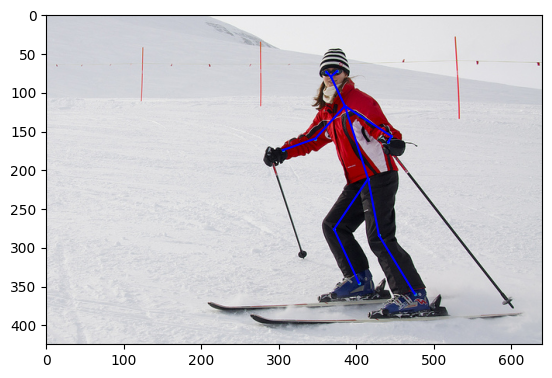

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('000000000785.jpg')

point_data=np.load('sample_data.npy')
point_edge_list=np.load('sample_edge.npy')
x=point_data[:,1]
y=point_data[:,2]
points=np.column_stack((x,y))
plt.imshow(img)
plt.scatter(x,y,s=2)
for edge in point_edge_list:
    p1=points[edge[0]]
    p2=points[edge[1]]
    plt.plot((p1[0],p2[0]),(p1[1],p2[1]),color='blue')

plt.show()

In [55]:
new_x=-1*points[0][0]
new_y =-1*points[0][1]

# 画像を移動させる
moved_img = np.zeros_like(img)
moved_img[new_y:new_y + img.shape[0], new_x:new_x + img.shape[1]] = img

ValueError: could not broadcast input array from shape (425,640,3) into shape (0,0,3)